# MILES BUSINESS INDIA PVT. LTD.
## DATA ANALYSIS PROJECT

### Step 1: Import Necessary Python Libraries

In [39]:
pip install scikit-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Step 2: Load the Data

In [12]:
# Load the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\BHARGO\Downloads\Datasets\ADFFOODS.csv")

# Display the first few rows of the DataFrame
print(df.head())

   Unnamed: 0  close             datetime exchange_code   high    low   open  \
0           0  69.00  2011-01-03 09:31:00           NSE  69.00  69.00  69.00   
1           1  69.95  2011-01-03 09:32:00           NSE  69.95  69.95  69.95   
2           2  68.20  2011-01-03 09:33:00           NSE  68.20  68.20  68.20   
3           3  68.35  2011-01-03 09:41:00           NSE  68.35  68.35  68.35   
4           4  68.25  2011-01-03 09:42:00           NSE  68.25  68.25  68.25   

  stock_code  volume  
0     ADFFOO     100  
1     ADFFOO     100  
2     ADFFOO     591  
3     ADFFOO      50  
4     ADFFOO     100  


### Step 3: Data Cleaning and Preprocessing

In [15]:
# Check for missing values
print(df.isnull().sum())

# Drop unnecessary columns if any
df = df.drop(columns=['Unnamed: 0'])

# Convert 'datetime' column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract date and time components
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute

Unnamed: 0       0
close            0
datetime         0
exchange_code    0
high             0
low              0
open             0
stock_code       0
volume           0
dtype: int64


### Step 4: Basic Statistical Analysis

               close                       datetime           high  \
count  671172.000000                         671172  671172.000000   
mean      359.690184  2019-11-14 21:27:45.520104704     359.916543   
min        37.050000            2011-01-03 09:31:00      37.050000   
25%       166.250000            2017-03-07 10:03:45     166.400000   
50%       247.650000            2020-05-18 12:15:00     247.900000   
75%       551.725000            2023-04-17 11:18:15     552.700000   
max      1182.200000            2025-02-19 15:29:00    1183.700000   
std       293.803304                            NaN     293.959810   

                 low           open        volume           hour  \
count  671172.000000  671172.000000  6.711720e+05  671172.000000   
mean      359.452210     359.683758  6.297495e+02      11.868931   
min        37.050000      37.050000 -7.020000e+02       9.000000   
25%       166.100000     166.250000  1.400000e+01      10.000000   
50%       247.450000     247.

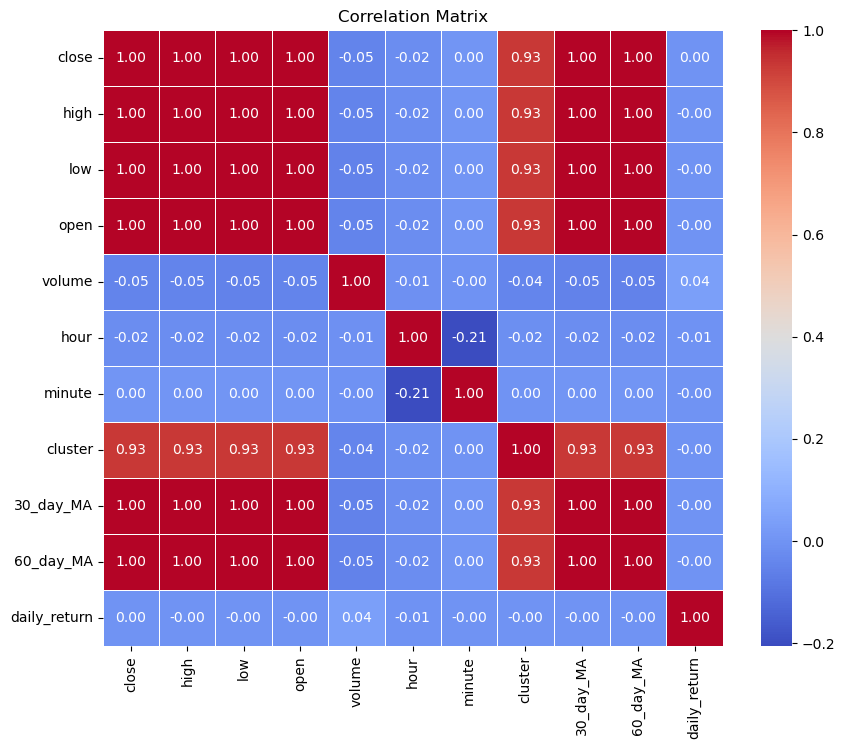

In [59]:
# Summary statistics
print(df.describe())

# Correlation matrix
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Check for missing values and handle them (e.g., drop rows with missing values)
numeric_df = numeric_df.dropna()

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Step 5: Time Series Analysis

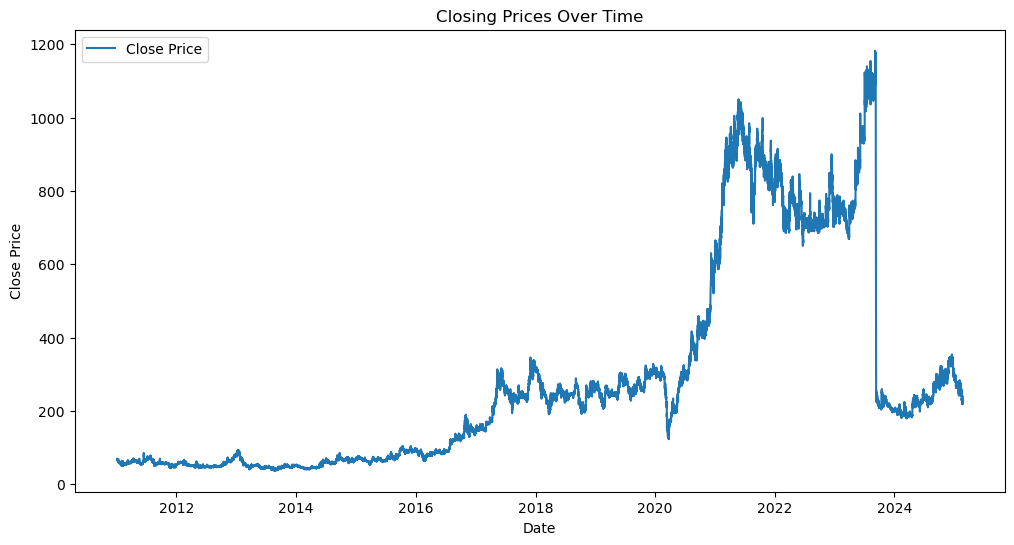

In [43]:
# Plot closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['close'], label='Close Price')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Step 6: Volume Analysis

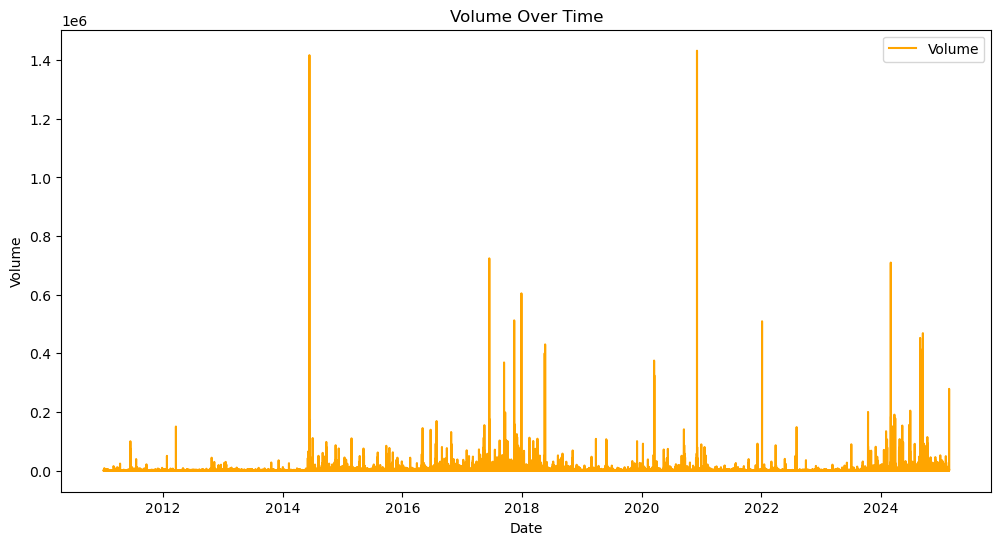

In [45]:
# Plot volume over time
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['volume'], label='Volume', color='orange')
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

### Step 7: Price and Volume Relationship

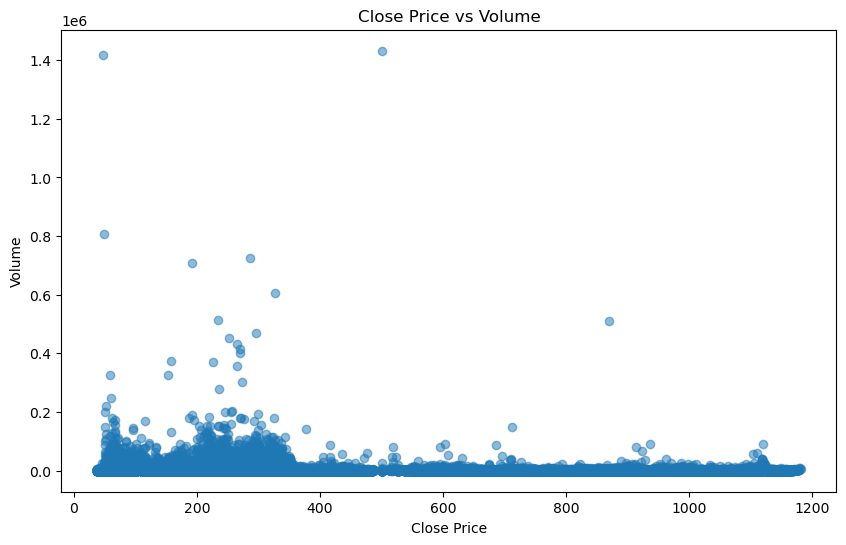

In [47]:
# Scatter plot of close price vs volume
plt.figure(figsize=(10, 6))
plt.scatter(df['close'], df['volume'], alpha=0.5)
plt.title('Close Price vs Volume')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.show()

### Step 8: Clustering Analysis

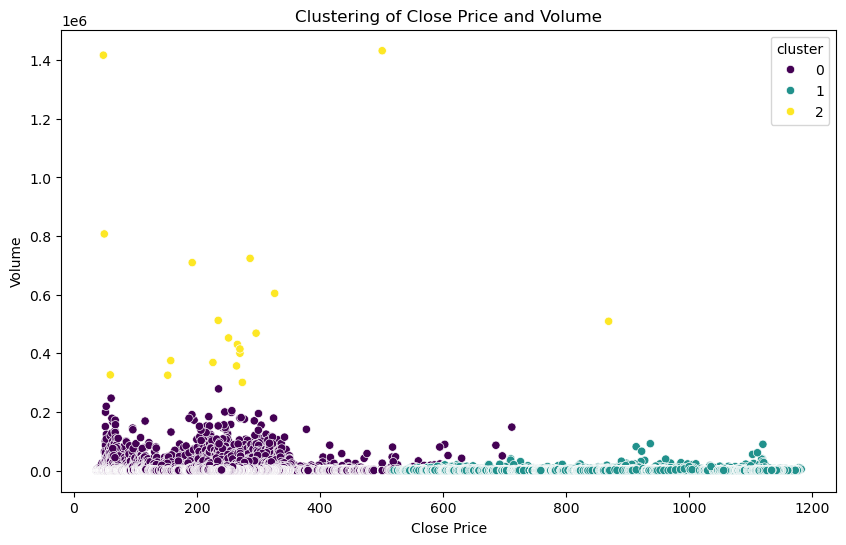

In [49]:
# Select features for clustering
features = df[['close', 'volume']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='close', y='volume', hue='cluster', data=df, palette='viridis')
plt.title('Clustering of Close Price and Volume')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.show()

### Step 9: Hourly Analysis

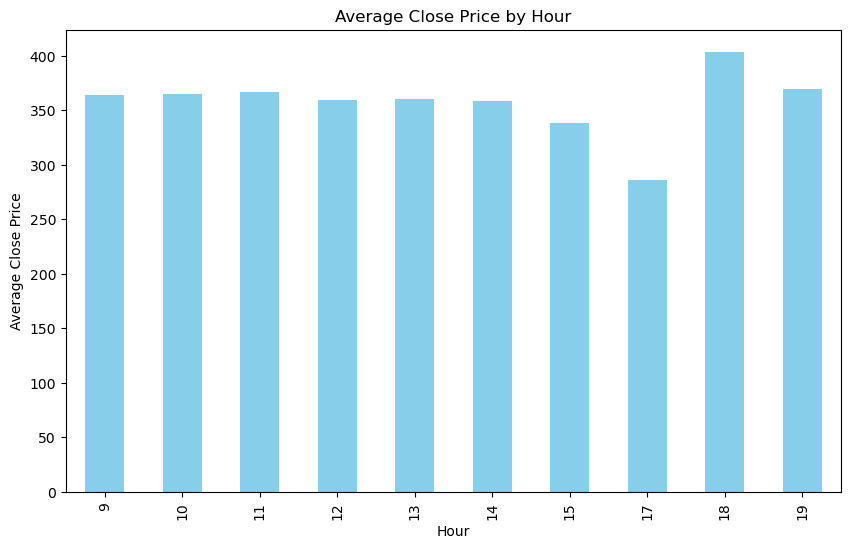

In [51]:
# Group by hour and calculate average close price
hourly_avg = df.groupby('hour')['close'].mean()

# Plot average close price by hour
plt.figure(figsize=(10, 6))
hourly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Close Price by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Close Price')
plt.show()

### Step 10: Day of Week Analysis

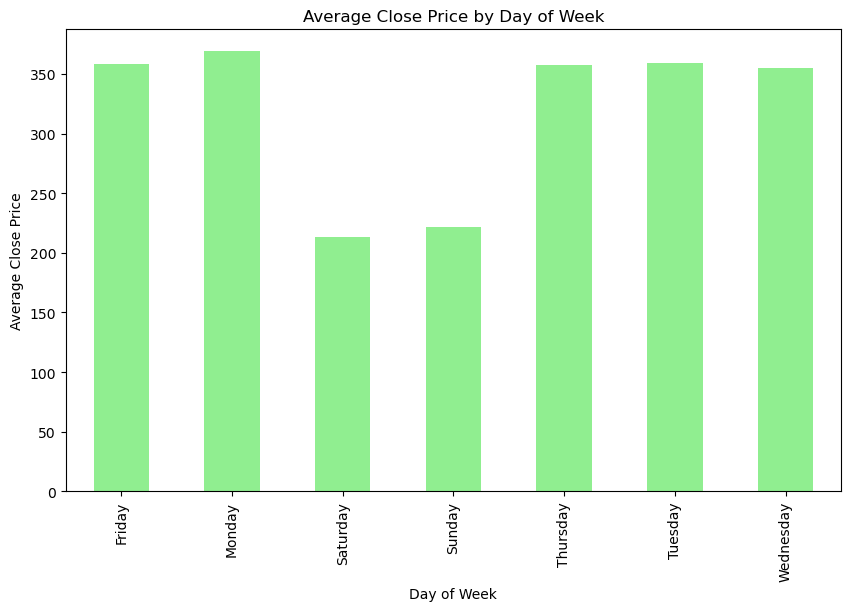

In [53]:
# Extract day of the week
df['day_of_week'] = df['datetime'].dt.day_name()

# Group by day of the week and calculate average close price
daily_avg = df.groupby('day_of_week')['close'].mean()

# Plot average close price by day of the week
plt.figure(figsize=(10, 6))
daily_avg.plot(kind='bar', color='lightgreen')
plt.title('Average Close Price by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Close Price')
plt.show()

### Step 11: Moving Averages

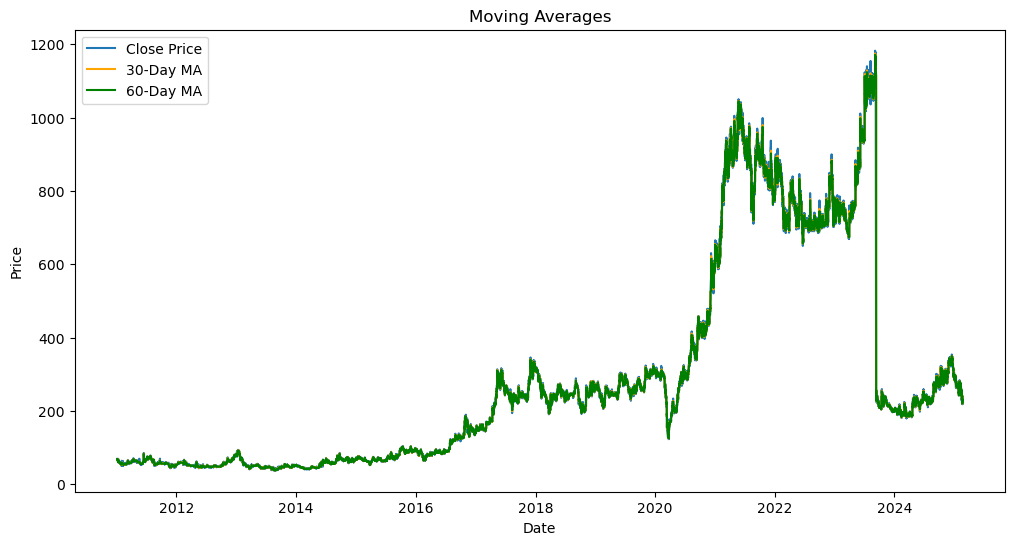

In [55]:
# Calculate moving averages
df['30_day_MA'] = df['close'].rolling(window=30).mean()
df['60_day_MA'] = df['close'].rolling(window=60).mean()

# Plot moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['close'], label='Close Price')
plt.plot(df['datetime'], df['30_day_MA'], label='30-Day MA', color='orange')
plt.plot(df['datetime'], df['60_day_MA'], label='60-Day MA', color='green')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Step 12: Volatility Analysis

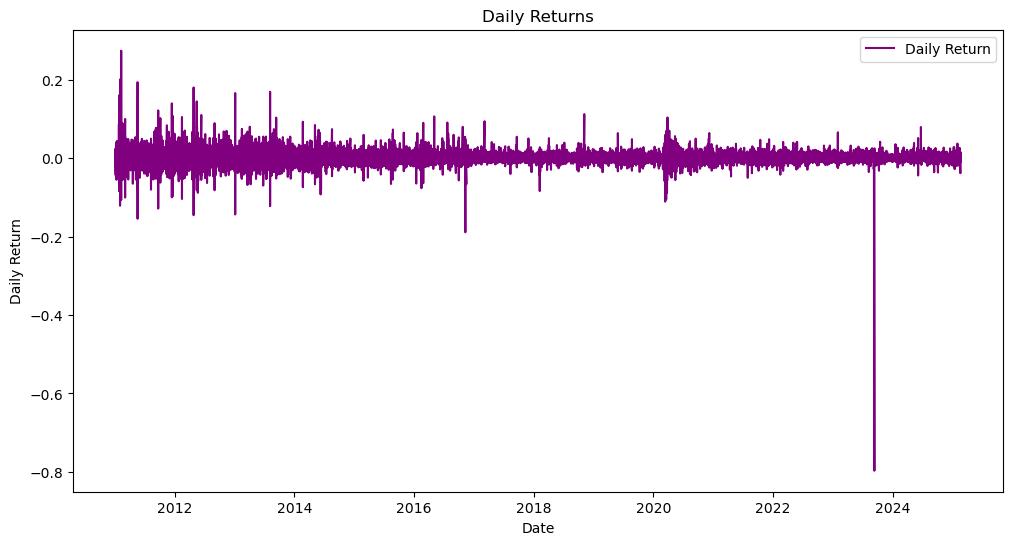

In [57]:
# Calculate daily returns
df['daily_return'] = df['close'].pct_change()

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['daily_return'], label='Daily Return', color='purple')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

## Summary of Patterns Identified

1) Trend Analysis : The closing prices show a general trend over time, which can be analyzed using moving averages.

2) Volume Analysis : Volume spikes can indicate significant trading activity, often corresponding to price changes.

3) Correlation : There is a correlation between closing prices and trading volume.

4) Clustering : The data can be clustered into groups based on price and volume, revealing different market conditions.

5) Hourly Patterns : Certain hours of the day may have higher average closing prices.

6) Day of Week Patterns : Certain days of the week may have higher average closing prices.

7) Volatility : Daily returns can be used to measure the volatility of the stock.